<h1>Image Segmentation Example</h1>
In this model we will separate objext from the background
<h3>Some Description</h3>
Where the goal is to “segment” or “partition” an image into
different areas, with each area usually representing a category (as seen in figure 9.1). For instance, when Zoom or Google Meet diplays a custom background behind you in a video call, it’s using an image segmentation model to
tell your face apart from what’s behind it, at pixel precision


<h4>2 types of image segmentation</h4>
There are two different flavors of image segmentation that you should know about:
<br><h5>Semantic segmentation</h5>, where each pixel is independently classified into a semantic category, like “cat.” If there are two cats in the image, the corresponding pixels are all mapped to the same generic “cat” category.
<br><h5>Instance segmentation</h5>, which seeks not only to classify image pixels by category,
but also to parse out individual object instances. In an image with two cats in it,
instance segmentation would treat “cat 1” and “cat 2” as two separate classes of
pixels


<h3>In this example</h3> we’ll focus on semantic segmentation: we’ll be looking once again at
images of cats and dogs, and this time we’ll learn how to tell apart the main subject
and its background.
We’ll work with the Oxford-IIIT Pets dataset (www.robots.ox.ac.uk/~vgg/data/
pets/), which contains 7,390 pictures of various breeds of cats and dogs, together with
foreground-background segmentation masks for each picture. A segmentation mask is
the image-segmentation equivalent of a label: it’s an image the same size as the input
image, with a single color channel where each integer value corresponds to the class
of the corresponding pixel in the input image. In our case, the pixels of our segmentation masks can take one of three integer values:
<br> 1 (foreground)
<br> 2 (background)
<br> 3 (contour)

<h2>Lets prepare the data

In [4]:
# lets prepate the data
import os

input_dir = 'images/images/'
target_dir = 'annotations/trimaps/'


In [7]:
for fnam in os.listdir(input_dir):
    print(fnam)

Abyssinian_1.jpg
Abyssinian_10.jpg
Abyssinian_100.jpg
Abyssinian_100.mat
Abyssinian_101.jpg
Abyssinian_101.mat
Abyssinian_102.jpg
Abyssinian_102.mat
Abyssinian_103.jpg
Abyssinian_104.jpg
Abyssinian_105.jpg
Abyssinian_106.jpg
Abyssinian_107.jpg
Abyssinian_108.jpg
Abyssinian_109.jpg
Abyssinian_11.jpg
Abyssinian_110.jpg
Abyssinian_111.jpg
Abyssinian_112.jpg
Abyssinian_113.jpg
Abyssinian_114.jpg
Abyssinian_115.jpg
Abyssinian_116.jpg
Abyssinian_117.jpg
Abyssinian_118.jpg
Abyssinian_119.jpg
Abyssinian_12.jpg
Abyssinian_120.jpg
Abyssinian_121.jpg
Abyssinian_122.jpg
Abyssinian_123.jpg
Abyssinian_124.jpg
Abyssinian_125.jpg
Abyssinian_126.jpg
Abyssinian_127.jpg
Abyssinian_128.jpg
Abyssinian_129.jpg
Abyssinian_13.jpg
Abyssinian_130.jpg
Abyssinian_131.jpg
Abyssinian_132.jpg
Abyssinian_133.jpg
Abyssinian_134.jpg
Abyssinian_135.jpg
Abyssinian_136.jpg
Abyssinian_137.jpg
Abyssinian_138.jpg
Abyssinian_139.jpg
Abyssinian_14.jpg
Abyssinian_140.jpg
Abyssinian_141.jpg
Abyssinian_142.jpg
Abyssinian_143.jpg


In [2]:
input_img_paths = sorted(
    [os.path.join(input_dir, fname)   for fname in os.listdir(input_dir)    if fname.endswith(".jpg")])

In [3]:
# input dir
input_img_paths

['images/images/Abyssinian_1.jpg',
 'images/images/Abyssinian_10.jpg',
 'images/images/Abyssinian_100.jpg',
 'images/images/Abyssinian_101.jpg',
 'images/images/Abyssinian_102.jpg',
 'images/images/Abyssinian_103.jpg',
 'images/images/Abyssinian_104.jpg',
 'images/images/Abyssinian_105.jpg',
 'images/images/Abyssinian_106.jpg',
 'images/images/Abyssinian_107.jpg',
 'images/images/Abyssinian_108.jpg',
 'images/images/Abyssinian_109.jpg',
 'images/images/Abyssinian_11.jpg',
 'images/images/Abyssinian_110.jpg',
 'images/images/Abyssinian_111.jpg',
 'images/images/Abyssinian_112.jpg',
 'images/images/Abyssinian_113.jpg',
 'images/images/Abyssinian_114.jpg',
 'images/images/Abyssinian_115.jpg',
 'images/images/Abyssinian_116.jpg',
 'images/images/Abyssinian_117.jpg',
 'images/images/Abyssinian_118.jpg',
 'images/images/Abyssinian_119.jpg',
 'images/images/Abyssinian_12.jpg',
 'images/images/Abyssinian_120.jpg',
 'images/images/Abyssinian_121.jpg',
 'images/images/Abyssinian_122.jpg',
 'imag

In [15]:
### it is an one line loop 
target_paths = sorted([os.path.join(target_dir, fname)  for fname in os.listdir(target_dir)  
                       if fname.endswith(".png") and not fname.startswith(".")])

In [16]:
target_paths

['annotations/trimaps/Abyssinian_1.png',
 'annotations/trimaps/Abyssinian_10.png',
 'annotations/trimaps/Abyssinian_100.png',
 'annotations/trimaps/Abyssinian_101.png',
 'annotations/trimaps/Abyssinian_102.png',
 'annotations/trimaps/Abyssinian_103.png',
 'annotations/trimaps/Abyssinian_104.png',
 'annotations/trimaps/Abyssinian_105.png',
 'annotations/trimaps/Abyssinian_106.png',
 'annotations/trimaps/Abyssinian_107.png',
 'annotations/trimaps/Abyssinian_108.png',
 'annotations/trimaps/Abyssinian_109.png',
 'annotations/trimaps/Abyssinian_11.png',
 'annotations/trimaps/Abyssinian_110.png',
 'annotations/trimaps/Abyssinian_111.png',
 'annotations/trimaps/Abyssinian_112.png',
 'annotations/trimaps/Abyssinian_113.png',
 'annotations/trimaps/Abyssinian_114.png',
 'annotations/trimaps/Abyssinian_115.png',
 'annotations/trimaps/Abyssinian_116.png',
 'annotations/trimaps/Abyssinian_117.png',
 'annotations/trimaps/Abyssinian_118.png',
 'annotations/trimaps/Abyssinian_119.png',
 'annotations/t

<h3>How the images looking

In [10]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img , img_to_array

In [11]:
len(input_img_paths)

7390

<h3>Viewing the images</h3>
Viewing the original images

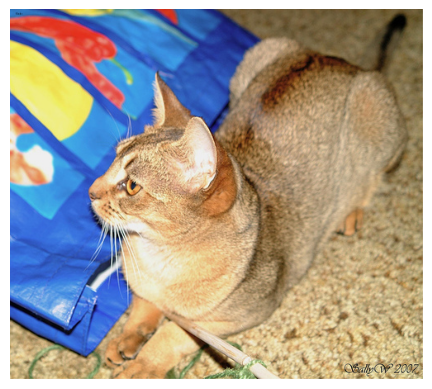

In [12]:
plt.axis('off')
plt.imshow(load_img(input_img_paths[9])) #displaying the 9th image

<h3>Viewing the target images (label images)</h3>
Label images are trimaps these are special images. These imaegs ranges from 0 to 2 normal images range from 0 to 255. If we view these images normaly we will see black images, so we have to convert them into normal image 

The trimaps look black because they only contain pixels values ranging from 0-2 on a scale of 0-255, where:

1 means "pet"
2 means "background"
3 means "border"

Here is the code to convert the images into gray scale
The original labels are 1, 2, and 3. We subtract 1 so that the
labels range from 0 to 2, and then we multiply by 127 so that
the labels become 0 (black), 127 (gray), 254 (near-white).

In [35]:
def display_target(target_array):
    print('the shape of target array',target_array.shape)
    print('target array before normalized\n',target_array[1])
    normalized_array = (target_array.astype("uint8") - 1) * 127
    plt.axis("off")
    print("normalized_array",normalized_array[2])
    plt.imshow(normalized_array)

the shape of target array (448, 500, 1)
target array before normalized
 [[2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.

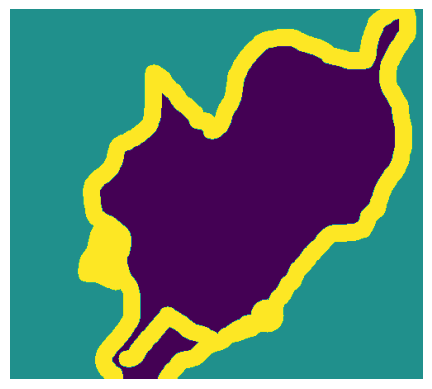

In [36]:
img = img_to_array(load_img(target_paths[9], color_mode="grayscale"))
display_target(img)

In [37]:
img.shape

(448, 500, 1)

<h3>Splitting and Preprocessing the data

In [38]:
import numpy as np
import random


In [39]:
img_size = (200, 200)
num_imgs = len(input_img_paths)

In [40]:
num_imgs

7390

Shuffle the file paths (they were
originally sorted by breed). We use the
same seed (1337) in both statements to
ensure that the input paths and target
paths stay in the same order

In [41]:
random.Random(1337).shuffle(input_img_paths)
random.Random(1337).shuffle(target_paths)

In [42]:
print(input_img_paths[:5])
print(target_paths[:5])

['images/images/British_Shorthair_47.jpg', 'images/images/beagle_143.jpg', 'images/images/german_shorthaired_142.jpg', 'images/images/scottish_terrier_145.jpg', 'images/images/japanese_chin_39.jpg']
['annotations/trimaps/British_Shorthair_47.png', 'annotations/trimaps/beagle_143.png', 'annotations/trimaps/german_shorthaired_142.png', 'annotations/trimaps/scottish_terrier_145.png', 'annotations/trimaps/japanese_chin_39.png']


In [47]:
def path_to_input_image(path):
    return img_to_array(load_img(path, target_size=img_size))

In [48]:
def path_to_target(path):
    img = img_to_array(
    load_img(path, target_size=img_size, color_mode="grayscale"))
    img = img.astype("uint8") - 1
    return img

<h4>loading images into an array</h4>
Load all images in the input_imgs
float32 array and their masks in the
targets uint8 array (same order). The
inputs have three channels (RBG values)
and the targets have a single channel
(which contains integer labels).

In [49]:
input_imgs = np.zeros((num_imgs,) + img_size + (3,), dtype="float32")
targets = np.zeros((num_imgs,) + img_size + (1,), dtype="uint8")

### reason for float 32
The conversion of the input images to `float32` in the line:

```python
input_imgs = np.zeros((num_imgs,) + img_size + (3,), dtype="float32")
```

is a common practice in machine learning, particularly when working with neural networks. Neural networks often perform better when working with floating-point numbers, and using `float32` is a standard choice for numerical stability and efficiency. Here's why it's done:

1. **Numerical Precision:** The `float32` data type uses 32 bits to represent each floating-point number. This provides sufficient numerical precision for most machine learning tasks while being more memory-efficient compared to higher-precision types like `float64`. Using `float32` is a balance between precision and computational efficiency.

2. **Compatibility with GPU Acceleration:** Many deep learning frameworks, including TensorFlow (as seen in your code), are optimized for GPU acceleration. GPUs are well-suited for processing floating-point operations, and using `float32` aligns well with the capabilities of modern GPUs. It helps improve the speed of training and inference.

3. **Normalization and Gradient Descent:** During the training of neural networks, optimization algorithms like gradient descent are commonly used to update the model parameters. Using `float32` helps avoid numerical instability issues that can arise during these optimization processes.

In summary, converting the input images to `float32` is a standard practice to ensure numerical stability, compatibility with deep learning frameworks, and efficient use of hardware resources, especially when dealing with large datasets and complex neural network architectures.

In [20]:
for i in range(num_imgs):
    input_imgs[i] = path_to_input_image(input_img_paths[i])
    targets[i] = path_to_target(target_paths[i])

data spliting

In [21]:
num_val_samples = 1000
train_input_imgs = input_imgs[:-num_val_samples]
train_targets = targets[:-num_val_samples]
val_input_imgs = input_imgs[-num_val_samples:]
val_targets = targets[-num_val_samples:]

In [22]:
print(len(train_input_imgs),len(train_targets))
print(train_input_imgs.shape)
print(train_targets.shape)
print(len(val_input_imgs),len(val_targets))

6390 6390
(6390, 200, 200, 3)
(6390, 200, 200, 1)
1000 1000


<h4>Defining the model

In [23]:
from keras import layers
from tensorflow import keras

<h3>Model explanation</h3>
in the first half we are downsampling the image and the output we get is in the form of 25 , 25 , 256. But we want our image back in the same size so in the 2nd half we are using Conv2DTranspose layer for upsampling the image back to 200,200,3

### calculation of output and parameters
Output Size:
output_size = input_size − kernel_size + 2 × padding / strides + 1

Number of Parameters:
params = ( kernel_size × kernel_size × input_channels + 1 ) × output_channels


Transposed Convolutional Layer:
Output Size:
output_size = input_size × strides + kernel_size − padding

Number of Parameters:

params=( kernel_size × kernel_size × output_channels + 1 ) × input_channels



Example Calculation (Conv2D Layer):
Given a Conv2D layer with the following parameters:

Input size: 100x100
Kernel size: 3x3
Padding: "same"
Strides: 2
Input channels: 64
Output channels: 128
Output Size:

output_size =  100 − 3 + 2 × 0 / 2 +1 = 50

Number of Parameters:
params=(3 × 3 × 64 + 1 ) × 128 = 73856

In [24]:
def get_model(img_size, num_classes):
    inputs = keras.Input(shape=img_size + (3,))
    x = layers.Rescaling(1./255)(inputs)
    x = layers.Conv2D(64, 3, strides=2, activation="relu", padding="same")(x)
    x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
    x = layers.Conv2D(128, 3, strides=2, activation="relu", padding="same")(x)
    x = layers.Conv2D(128, 3, activation="relu", padding="same")(x)
    x = layers.Conv2D(256, 3, strides=2, padding="same", activation="relu")(x)
    x = layers.Conv2D(256, 3, activation="relu", padding="same")(x)
   
    x = layers.Conv2DTranspose(256, 3, activation="relu", padding="same")(x)
    x = layers.Conv2DTranspose(
    256, 3, activation="relu", padding="same", strides=2)(x)
   
    x = layers.Conv2DTranspose(128, 3, activation="relu", padding="same")(x)
   
    x = layers.Conv2DTranspose(
    128, 3, activation="relu", padding="same", strides=2)(x)
    x = layers.Conv2DTranspose(64, 3, activation="relu", padding="same")(x)
   
    x = layers.Conv2DTranspose(
    64, 3, activation="relu", padding="same", strides=2)(x)
   
    outputs = layers.Conv2D(num_classes, 3, activation="softmax",
    padding="same")(x)
    
    model = keras.Model(inputs, outputs)
    return model

In [25]:
model = get_model(img_size=img_size, num_classes=3)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 200, 200, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 100, 100, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 100, 100, 64)      36928     
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 50, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 50, 50, 128)       147584    
                                                                 
 conv2d_4 (Conv2D)           (None, 25, 25, 256)       295168

In [26]:
model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy")
callbacks = [
keras.callbacks.ModelCheckpoint("oxford_segmentation.keras",
save_best_only=True)
]

In [27]:
history = model.fit(train_input_imgs, train_targets,
epochs=50,
callbacks=callbacks,
batch_size=10,
validation_data=(val_input_imgs, val_targets))

Epoch 1/50
639/639 [==============================] - 47s 68ms/step - loss: 0.9395 - val_loss: 0.7280
Epoch 2/50
639/639 [==============================] - 43s 67ms/step - loss: 0.6634 - val_loss: 0.5759
Epoch 3/50
639/639 [==============================] - 43s 67ms/step - loss: 0.5661 - val_loss: 0.5102
Epoch 4/50
639/639 [==============================] - 43s 67ms/step - loss: 0.5140 - val_loss: 0.5138
Epoch 5/50
639/639 [==============================] - 43s 67ms/step - loss: 0.4776 - val_loss: 0.4489
Epoch 6/50
639/639 [==============================] - 43s 67ms/step - loss: 0.4463 - val_loss: 0.4138
Epoch 7/50
639/639 [==============================] - 43s 67ms/step - loss: 0.4244 - val_loss: 0.3970
Epoch 8/50
639/639 [==============================] - 43s 67ms/step - loss: 0.4065 - val_loss: 0.3967
Epoch 9/50
639/639 [==============================] - 43s 67ms/step - loss: 0.3886 - val_loss: 0.4161
Epoch 10/50
639/639 [==============================] - 43s 67ms/step - loss: 0.377

In [28]:
model.save('image_new.h5')

In [29]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

<h4>Visulizing the model</h4>

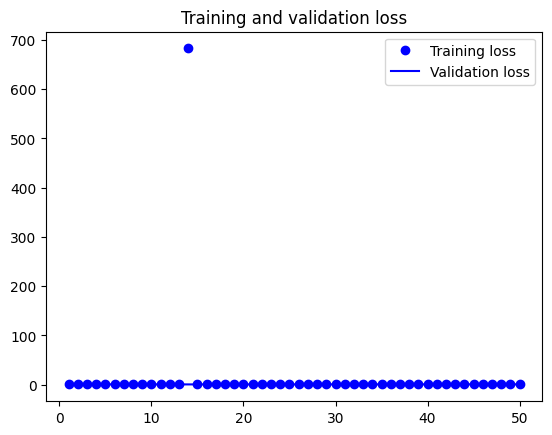

In [30]:
epochs = range(1, len(history.history["loss"]) + 1)
loss = history.history["loss"]
val_loss = history.history["val_loss"]
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()

<h4>Testing the image

In [31]:
from keras.utils import array_to_img

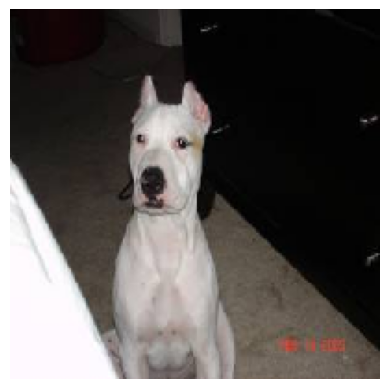

In [33]:
loading_model = keras.models.load_model("image_new.h5")
i = 4 
test_image = val_input_imgs[i]
plt.axis('off')
plt.imshow(array_to_img(test_image))

1/1 [==============================] - 1s 1s/step


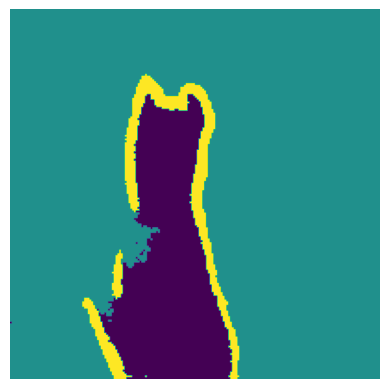

In [34]:
mask = loading_model.predict(np.expand_dims(test_image,0))[0]
def display_mask(pred):
    mask = np.argmax(pred,axis=-1)
    mask *= 127
    plt.axis('off')
    plt.imshow(mask)
    
    
display_mask(mask)